# This LDA implementation is based on:
# Tharwat, A., Gaber, T., Ibrahim, A., & Hassanien, A. E. (2017). Linear discriminant analysis: A detailed tutorial. Ai communications, 30(2), 169–190
# Cornish, C. K. (2023). Principal component analysis. Excercise Session 21, IT University of Copenhagen, 17/11/202
# Alpaydin, E. (2020). Introduction to machine learning. MIT press.
# Ghodsi, A. (2015). Pca, fisher’s discriminant analysis (fda), university of waterloo. https://youtu.be/hGKt0yy9q_E.Accessed 18/12/23

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams.update({'text.usetex': True}) # import to make plots nicer
%config InlineBackend.figure_format = 'svg' # import to make plots nicer

# Set global font size for title, x-label, and y-label
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16
# Set global font size for x and y tick labels
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
# Set global font size for the legend
plt.rcParams['legend.fontsize'] = 16
# turn off warnings 
import warnings
warnings.filterwarnings('ignore')

# Loading the datasets 


In [2]:
# loading the train and test set
train = np.load('fashion_train.npy')
test = np.load('fashion_test.npy')

# splitting the data and labels

# train set
Y = train[:, -1]  # for last column
X = train[:,:-1] # for all except last column 

# test set 
X_t = test[:,:-1]
Y_t = test[:, -1]

# Preprocessing 

In [3]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler
# standardizing the data

stscalar = StandardScaler()

X_std = stscalar.fit_transform(X)
X_t_std = stscalar.fit_transform(X_t)

In [4]:
# https://www.geeksforgeeks.org/replacing-strings-with-numbers-in-python-for-data-analysis/
# replacing integer labels with string labels
fashion_dictionary = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress',
        4: 'Shirt'}
#Y_train = [fashion_dictionary[i] for i in Y_train]
Y = [fashion_dictionary[i] for i in Y]
#Y_t = [fashion_dictionary[i] for i in Y_t]

In [5]:
# create dataframe of features of train dataset
df = pd.DataFrame(X_std)

# add label to the dataframe
df['label'] = Y 

# Implementation of LDA 

Splitting the dataset into $c$ classes, where $k=1,\ldots, c$. \\
$X = \left[\omega_1, \omega_2, \ldots, \omega_c \right]$, 
The $\omega_k$ represents the subset of instances belonging to the $k^{th}$ class.

In [6]:
# splitting the train dataset into classes
class0 = df[df['label'] == 'T-shirt/top']
class1 = df[df['label'] == 'Trouser']
class2 = df[df['label'] == 'Pullover']
class3 = df[df['label'] == 'Dress']
class4 = df[df['label'] == 'Shirt']


# Mean of entire dataset 
$\mu = \frac{1}{N} \sum^N_{i=1} x_i$

In [7]:
# mean for the entire dataset
mean = np.mean(X_std, axis=0)


In [8]:
mean

array([ 7.61116864e-16, -7.09554637e-16,  8.63961680e-17, -5.67463437e-16,
       -4.49254522e-16,  2.08774387e-15, -6.61642963e-16, -6.73400224e-16,
        4.63928895e-16,  2.25197638e-16, -2.79776202e-17,  3.71858100e-16,
        3.70348197e-16,  4.22817337e-16, -7.94919686e-16,  2.60236277e-16,
       -3.19706761e-16, -2.92632585e-16,  2.09365858e-16,  4.80027129e-16,
       -6.10400619e-16, -2.35211850e-16, -9.10188591e-16,  5.23953103e-16,
        7.22973070e-16, -8.33791369e-16, -1.67776210e-16,  6.38888942e-16,
        1.29526320e-15, -3.03983227e-16,  4.44083659e-16, -6.72568945e-16,
       -7.05177583e-16, -3.13865600e-16, -5.15065768e-16,  3.24040794e-16,
       -2.90989455e-16,  2.58593147e-16, -2.23371321e-16, -2.89709576e-16,
       -7.62639951e-17, -2.10054196e-17, -4.95825603e-17,  1.27597932e-16,
        6.66244837e-17,  2.07331374e-16,  4.59521310e-17,  7.63999974e-16,
        9.79516468e-16, -8.70381545e-16, -2.26985097e-17,  1.43977885e-15,
       -1.14557530e-15,  

# Mean of each class


Calculate mean of each class, 
    $\mu_{k} = \dfrac{1}{n_{k}} \sum_{x_{i} \in \omega_k}.$

In [9]:
# helper function for calculating the mean of the class 
def class_mean(df):
    # calculate mean of the class
    class_mean = np.mean(df, axis=0)
    # covert the mean into np.array
    class_mean = np.array(class_mean)
    return class_mean

# $S_B$ matrix
Calculate $S_B$ matrix
$S_B = \sum_{k=1}^{c} n_k (\mu_k - \mu)(\mu_k-\mu)^{T}$

In [10]:
# calculate the SB matrix
def SB_matrix(mean, df):
    # calculate mean of the class
    mean_of_the_class = class_mean(df)
    # difference between the class mean and mean of th entire dataset
    dif_cl_tot_mean = mean_of_the_class - mean
    # calculate the SB matrix for a class
    SB_mat = len(df) * np.outer(dif_cl_tot_mean, dif_cl_tot_mean)
    return SB_mat

In [11]:
# matrix for dataset
SB0 = SB_matrix(mean, class0)
SB1 = SB_matrix(mean, class1)
SB2 = SB_matrix(mean, class2)
SB3 = SB_matrix(mean, class3)
SB4 = SB_matrix(mean, class4)

In [12]:
# summing up the matrices for train dataset 
SB = SB0 + SB1 + SB2 + SB3 + SB4

In [13]:
SB

array([[ 3.03792215e+00,  1.79373040e+00, -3.39670185e-01, ...,
        -1.79709161e+01, -8.26302454e+00, -1.71139019e-01],
       [ 1.79373040e+00,  7.46824472e+00,  1.35327792e+01, ...,
        -5.79790414e+00, -2.85424384e+00,  1.76038874e-01],
       [-3.39670185e-01,  1.35327792e+01,  3.11577148e+01, ...,
         2.07777876e-01, -8.55709865e-01, -4.71970721e-01],
       ...,
       [-1.79709161e+01, -5.79790414e+00,  2.07777876e-01, ...,
         3.94717623e+02,  1.87636592e+02,  3.72541164e+01],
       [-8.26302454e+00, -2.85424384e+00, -8.55709865e-01, ...,
         1.87636592e+02,  8.93119908e+01,  1.78101098e+01],
       [-1.71139019e-01,  1.76038874e-01, -4.71970721e-01, ...,
         3.72541164e+01,  1.78101098e+01,  4.75125259e+00]])

# SW Matrix
$S_{W} = \sum_{k=1}^{c} \sum_{i=1}^{n_k} (x_{ik} - \mu_k)(x_{ik} - \mu_k)^T$

In [14]:
def SW_matrix(df):
    mean_of_the_class = class_mean(df)
    # difference between the class mean and mean of th entire dataset
    # removing label
    df = df.drop('label', axis=1)
    # converting to np array
    dataframe_no_lab = np.array(df)
    # calculating distance between sample and mean
    d = dataframe_no_lab - mean_of_the_class
    SW_mat = d.T @ d
    return SW_mat

In [15]:
SW_0 = SW_matrix(class0)
SW_1 = SW_matrix(class1)
SW_2 = SW_matrix(class2)
SW_3 = SW_matrix(class3)
SW_4 = SW_matrix(class4)

In [16]:
SW = SW_0 + SW_1 + SW_2 + SW_3 + SW_4

In [17]:
# Finding inverse of SW from train dataset
SW_inv = np.linalg.inv(SW)

# Finding W
$W = S_W^{-1}S_B$

In [18]:
# finding the matrix W
W = SW_inv @ SB

In [19]:
# calculating eigenvectors and eigenvalues of train dataset
eigen_vals, eigen_vecs = np.linalg.eig(W)

In [20]:
# keeping only the real part og eigenvalues and eigenvectors
eigen_vecs = eigen_vecs.real
eigen_vals = eigen_vals.real

In [21]:
# sorting the eigenvalues and eigenvectors in descending order
order = np.argsort(eigen_vals)[::-1]

# ordering the matrices, so we have the index of largest first
sort_eigen_vals = eigen_vals[order]
sort_eigen_vecs = eigen_vecs[:,order]

In [22]:
# projecting the test and train data onto the lower dimensional space
lds = X_std @ sort_eigen_vecs
lds_t = X_t_std @ sort_eigen_vecs
# first principal component

# extracting the first two principal components
LDA_from_scratch = lds[:,:2]
LDA_from_scratch_t = lds_t[:,:2]

In [23]:
# saving the first two principal components in a dataframe
lda_df = pd.DataFrame(LDA_from_scratch, columns=['LDA1', 'LDA2'])
# save to csv
#https://blog.finxter.com/python-csv-to-utf-8/
lda_df.to_csv('final_train.csv', encoding='utf-8', index=False)

In [24]:
lda_df_t = pd.DataFrame(LDA_from_scratch_t, columns=['LDA1', 'LDA2'])
# save to csv
#https://blog.finxter.com/python-csv-to-utf-8/
lda_df_t.to_csv('final_test.csv', encoding='utf-8', index=False)

In [25]:
lda_df.head()

LDA1      LDA2
0 -1.231498  0.213996
1  2.495080 -0.404526
2 -0.934255  0.187958
3 -0.252536  0.490760
4 -0.407214 -0.189248

In [26]:
# plot the LDA implemented from scratch
plt.figure(figsize = (8,8))
sns.scatterplot(data = lda_df, x ='LDA1', y ='LDA2', palette="nipy_spectral", hue=Y, alpha=0.5, s=50)
# add the legent to right upper corner of the plot
plt.legend(bbox_to_anchor=(0.7, 0.71))
plt.title('First two LDA variables of the Fashion MNIST dataset (from scratch)')
plt.savefig('LDA_from_scratch.png', dpi=300, bbox_inches='tight')

plt.show();

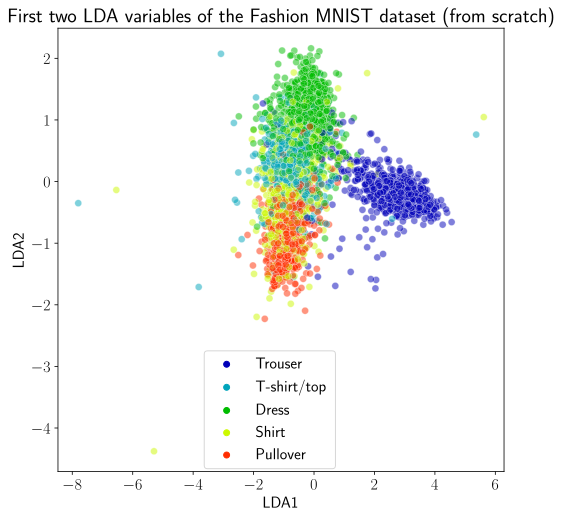

In [48]:
# plot the reduced test LDA set
plt.figure(figsize = (8,8))
sns.scatterplot(data = lda_df_t, x ='LDA1', y ='LDA2', palette="nipy_spectral", hue=Y_t, alpha=0.5, s=50)
# add the legent to right upper corner of the plot
plt.legend(bbox_to_anchor=(0.31, 0.29))
plt.title('First two LDA variables of the Fashion MNIST dataset (from scratch)')
plt.savefig('LDA_from_scratch_t.png', dpi=300, bbox_inches='tight')
plt.show();

In [49]:
# Test the correctness with Scikit-learn # https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

x_lda = LDA(n_components=2, solver='eigen').fit_transform(X, Y)
LDA = x_lda[:, :2]
LDA_scikit_df_s = pd.DataFrame(LDA, columns=['LDA1', 'LDA2'])

plt.figure(figsize=(8, 8))
sns.scatterplot(data=LDA_scikit_df_s, x='LDA1', y='LDA2', palette="nipy_spectral", hue=Y, alpha=0.5, s=50)
plt.legend(bbox_to_anchor=(0.7, 0.71))
plt.title('First two LDA variables of the Fashion MNIST dataset (sklearn)')
plt.savefig('LDA_library.png', dpi=300, bbox_inches='tight')
plt.show();